In [26]:
import sys
sys.path.append("..")
import functools
import pickle

import numpy as np
import torch
import scipy.linalg
import scipy.optimize
import scipy.integrate
import matplotlib.pyplot as plt
from dict_minimize.torch_api import minimize
import functorch
import pyequion2

import tmcdiff

In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
TK = 298.15
bulk_velocity = 1e0
pipe_diameter = 1e-2
species = ["C", "Ca", "Na", "Cl", "Mg"]
phases = ["Calcite", "Dolomite"]
c_nahco3 = 0.018
c_cacl2 = 0.006
c_nacl = 0.003
c_mgcl2 = 0.0003
molal_balance = {'C':c_nahco3,
                 'Ca':c_cacl2,
                 'Na':c_nahco3 + c_nacl,
                 'Cl':2*c_cacl2 + c_nacl + 2*c_mgcl2,
                 'Mg': c_mgcl2}
ngrid = 20
ypmax = 5

In [29]:
solver = tmcdiff.TransportSolver(species)
solver.set_flow_conditions(TK, bulk_velocity, pipe_diameter)
solver.set_initial_conditions(molal_balance, phases)
solver.build_transport(ngrid, ypmax)
solver.set_initial_guess()

In [30]:
eqsys_front = pyequion2.EquilibriumSystem(species, from_elements=True,
                                           activity_model="DEBYE")
sol, _ = eqsys_front.solve_equilibrium_mixed_balance(TK, molal_balance=molal_balance)
sol.saturation_indexes

{'Aragonite': 1.4424495560048136,
 'Calcite': 1.586219403397049,
 'Dolomite': 2.011515856275441,
 'Halite': -5.2314884723512955,
 'Vaterite': 1.0197879091827495}

In [31]:
solver.solve(100.0, print_frequency=1)

0.0008332460405889332%
0.07985797136201132%
0.08436676451164365%
0.088875557661276%
0.1339634891575993%
0.5848428041208327%
0.5851289584368478%
0.5854151127528628%
0.5882766559130143%
0.616892087514528%
0.903046403529665%
0.9040008745705808%
0.9049553456114965%
0.9145000560206542%
1.0099471601122316%
1.017516683243437%
1.0250862063746424%
1.1007814376866971%
1.1822655310862429%
1.2637496244857886%
1.2793468308136546%
1.2949440371415206%
1.4509161004201807%
1.4524758210529674%
1.454035541685754%
1.46963274801362%
1.4852299543414857%
1.523265735430422%
1.875796191987996%
1.892424707294954%
1.9090532226019121%
2.075338375671493%
2.0770012272021887%
2.0786640787328845%
2.0952925940398424%
2.261577747109423%
2.278206262416381%
2.294834777723339%
2.4611199307929197%
2.4694341884463986%
2.4777484460998775%
2.5608910226346677%
2.596291658896029%
2.6316922951573907%
2.985698657771006%
2.990164664314405%
2.994630670857804%
3.0392907362917922%
3.485891390631676%
3.4873966648327372%
3.488901939033

40.84200925598825%
40.84321168768715%
40.85523600467614%
40.975479174565955%
42.177910873464114%
42.18166847252317%
42.18542607158222%
42.2230020621728%
42.59876196807847%
42.599701367843224%
42.60064076760799%
42.610034765255634%
42.703974741732054%
43.64337450649625%
43.645723005908145%
43.64807150532006%
43.67155649943916%
43.906406440630214%
43.93282955116589%
43.95925266170157%
44.134768326926775%
44.137525471085226%
44.14028261524368%
44.1678540568282%
44.44356847267337%
44.457354193465626%
44.47113991425788%
44.60899712218047%
44.63656856376499%
44.66414000534951%
44.939854421194674%
44.94391831129226%
44.947982201389834%
44.98862110236557%
45.39501011212295%
45.400089974744915%
45.405169837366884%
45.45596846358656%
45.96395472578328%
45.97093435379589%
45.977913981808506%
46.04771026193467%
46.74567306319632%
46.748032070846335%
46.75039107849637%
46.77398115499669%
47.00988191999987%
47.01542167977114%
47.020961439542404%
47.07635903725507%
47.63033501438167%
47.655393859805%

In [34]:
solver.save("results/restest3")

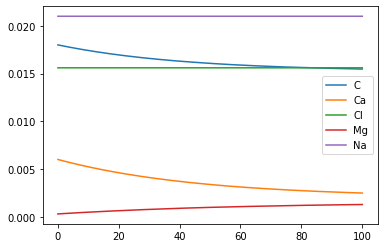

In [35]:
for i, el in enumerate(solver.eqsys.solute_elements):
    plt.plot(solver.t, solver.x[:, i], label=el)
plt.legend()